###### Import Statement

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
import copy
import random
from random import randrange
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from scipy import misc
from collections import OrderedDict
from operator import itemgetter
%matplotlib inline


###### Preprocessing

In [3]:
#Titanic Dataset
#https://www.kaggle.com/c/titanic/data
def get_titanic_data():
    df_titanic=pd.read_csv('titanic.csv',)
    #Remove unnecessary columns (body= Body Indentification number, Name= Name)
    df_titanic.drop(['name','body'],1,inplace=True)
    #Fill all the na  
    df_titanic.cabin.fillna('unknown',inplace=True)
    df_titanic.age.fillna(df_titanic['age'].mean(),inplace=True)
    df_titanic.fillna(0,inplace=True)
    #Covert nonnumeric value into numeric
    df_titanic['sex'] = LabelEncoder().fit_transform(df_titanic['sex'])
    df_titanic['cabin'] = LabelEncoder().fit_transform(df_titanic['cabin'].astype(str))
    df_titanic['embarked'] = LabelEncoder().fit_transform(df_titanic['embarked'].astype(str))
    df_titanic['home.dest'] = LabelEncoder().fit_transform(df_titanic['home.dest'].astype(str))
    df_titanic['ticket'] = LabelEncoder().fit_transform(df_titanic['ticket'])
    df_titanic['boat'] = LabelEncoder().fit_transform(df_titanic['boat'].astype(str))
    # df_titanic.head()
    # df_titanic.dtypes
    # print(df_titanic.isnull().sum())
    y = df_titanic['pclass']
    X = df_titanic.drop("pclass", axis = 1)
    return X,y

###### Train_Test_Spliting

In [4]:
#To split the dataset into 3 parts
def data_split(X_Data,y_Target):   
    X_train, X_test, y_train, y_test= train_test_split(X_Data, y_Target, test_size=0.4)
    X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.5)
    return X_train,X_val,X_test,y_train,y_val,y_test

In [5]:
X,y=get_titanic_data()
X_train,X_val,X_test,y_train,y_val,y_test=data_split(X,y)
feature_list=X_train.columns

In [6]:
#Creating random forest object and training the forest with the training data
objRandom=RandomForestClassifier(n_estimators=100,random_state=1)
objRandom.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [7]:
#Decision trees in the random forest
print(objRandom.estimators_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1791095845, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2135392491, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le

C:\Users\Petrofac\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


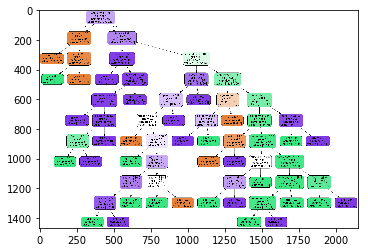

In [8]:
# Acessing a tree from random forest classifier
randomForestTree1 = objRandom.estimators_[0]
# Export the image to a dot file
export_graphviz(randomForestTree1, out_file = 'tree.dot', feature_names = feature_list, filled=True, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png');
file = misc.imread('tree.png')
plt.imshow(file)

In [9]:
listColumn=[]
instanceNumbr ='inst'
for inst in range(len(X_train)):
    columnHeader=instanceNumbr+str(inst+1)
    listColumn.append(columnHeader)

listlabel=[]
decisionTree ='DTree'
for header in range(objRandom.n_estimators):
    rowHeader=decisionTree+str(header)
    listlabel.append(rowHeader)

listPredict=[]
for estimators in objRandom.estimators_:
    estimators.classes_=objRandom.classes_
    predictions=estimators.predict(X_train)
    listPredict.append(predictions)
    #print(predictions)
    #print(estimators)
    
#print(listColumn)
#print(listlabel)
#print(listPredict)
#tListPredict=np.transpose(listPredict)
#print(tListPredict)

df1 = pd.DataFrame(listPredict,columns=listColumn)
df2 = pd.DataFrame(listlabel)
clusterSet=pd.concat([df2,df1],axis=1)
# tc = np.transpose(clusterSet)
# pd.concat([df2,df1],axis=1)
# print(tc.head())
# tc1= tc.drop(0, axis = 1)
# print(clusterSet)
# print(listPredict)

In [10]:
df1

,inst1,inst2,inst3,inst4,inst5,inst6,inst7,inst8,inst9,inst10,...,inst383,inst384,inst385,inst386,inst387,inst388,inst389,inst390,inst391,inst392
0,2,3,3,3,1,1,3,3,3,3,...,3,3,3,2,1,1,1,3,3,2
1,2,3,3,3,2,1,3,3,3,3,...,3,3,3,3,1,1,1,3,3,2
2,2,3,3,3,1,1,3,3,3,3,...,3,3,3,2,1,1,1,3,3,2
3,2,3,3,3,1,1,3,3,3,3,...,3,3,3,2,1,1,1,3,3,2
4,2,3,3,3,1,1,3,3,3,3,...,3,3,3,2,1,1,1,3,3,2
5,2,3,3,3,1,1,3,3,3,3,...,3,3,3,2,1,1,1,3,3,2
6,2,3,3,3,1,1,3,3,3,3,...,3,3,3,2,1,1,1,3,3,2
7,2,3,3,3,1,1,3,3,3,3,...,2,3,3,2,1,1,1,3,3,2
8,2,3,3,3,1,1,3,3,3,3,...,3,3,3,2,1,1,1,3,3,3
9,2,3,3,3,1,1,3,3,3,3,...,3,3,3,2,1,1,1,3,3,2
